In [1]:
from preprocessing import process_data
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
from datetime import datetime

In [3]:
mp_25 = process_data('./data/mp25.csv', 'mp_25')

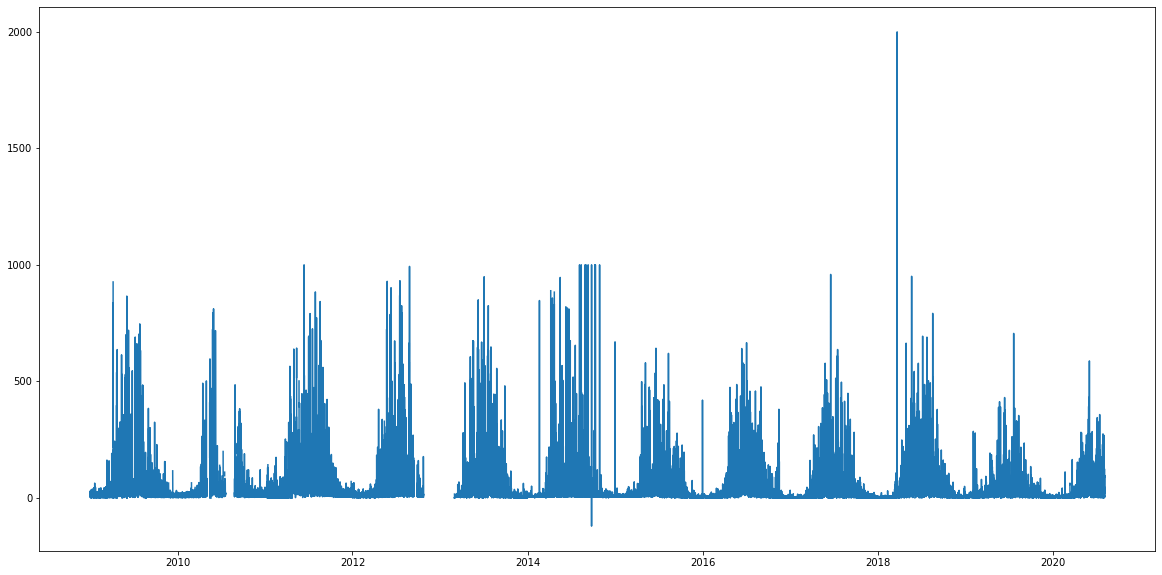

In [4]:
plt.figure(figsize=(20,10))
plt.plot(mp_25['datetime'], mp_25['mp_25'])

$$
A\sin(\omega t + \phi) + c
$$

In [5]:
def f(t, A, omega, phi, c):
    return A * np.sin(omega * t + phi) + c

In [6]:
t_0 = datetime(year=2009, month=1, day=1, hour=0, minute=0, second=0)

In [7]:
delta = mp_25.dropna()['datetime'] - t_0

In [8]:
segundos = delta.dt.total_seconds()

In [9]:
largo = len(segundos)

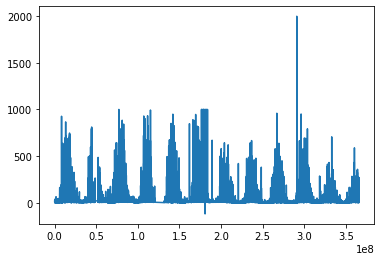

In [10]:
plt.plot(segundos, mp_25.dropna()['mp_25'])

In [11]:
p0 = [250, 1/1e7, 0, 250]

In [27]:
model = curve_fit(f, segundos.values, 1000*mp_25.dropna()['mp_25'], p0=p0, method='lm')

In [28]:
t = np.arange(0, 4*1e8, 50) 
y = f(t, *model[0])


In [17]:
%matplotlib notebook

In [29]:
model[0]

array([7.12393883e+03, 1.07744915e-07, 1.28049984e+01, 3.52987949e+04])

In [25]:
from scipy.stats import linregress

In [26]:
linregress(segundos, mp_25.dropna()['mp_25'])

LinregressResult(slope=-6.066925184848607e-08, intercept=46.89718139961751, rvalue=-0.09540197136983422, pvalue=7.710895032279915e-189, stderr=2.0651741249071857e-09)

<IPython.core.display.Javascript object>


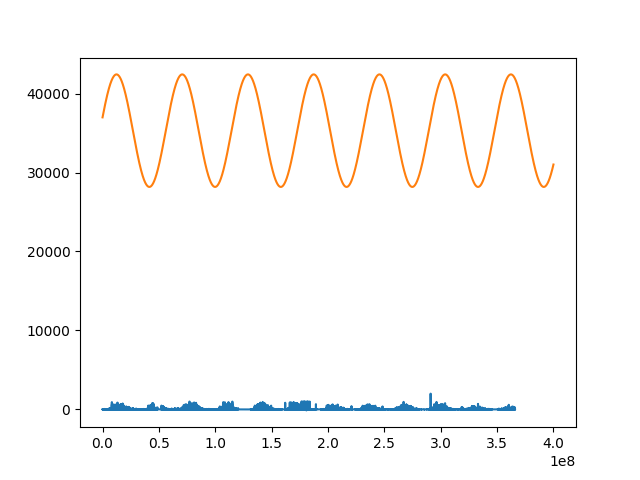

In [31]:
plt.figure()
plt.plot(segundos.values, mp_25.dropna()['mp_25'])
plt.plot(t, y)

In [14]:
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

In [22]:
yy = fit_sin(segundos.values, mp_25.dropna()['mp_25'])['fitfunc'](segundos)

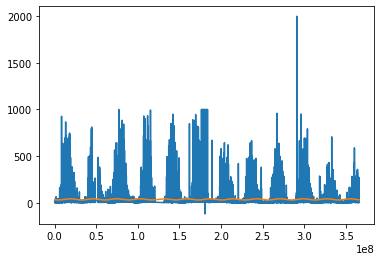

In [23]:
plt.plot(segundos.values, mp_25.dropna()['mp_25'])
plt.plot(segundos, yy)

In [20]:
import numpy, scipy

In [ ]:
curve_fit?

In [34]:
! pip3 install nfft

     |████████████████████████████████| 270 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 99 kB 1.1 MB/s eta 0:00:01:01
     |████████████████████████████████| 43 kB 4.6 MB/s  eta 0:00:01
  Created wheel for nfft: filename=nfft-0.1-py3-none-any.whl size=9076 sha256=1e9c29dc56df368f5d23e341c1010d64765cba56126f44d66b79398ca721dfaa
  Stored in directory: /Users/tomasrojasc/Library/Caches/pip/wheels/c6/c9/54/030cb6e04a990461f242b837078dbb67b7271d62d149a87943
Successfully built nfft


In [33]:
t = np.arange(0, segundos.max(), 1)

In [34]:
y = f(t, *model[0])

In [23]:
model

(array([ 0.97903175,  1.00000003,  0.28520991, 35.41010728]),
 array([[ 2.30511576e-01,  1.75893952e-09, -2.09131292e-03,
         -1.21972788e-04],
        [ 1.75893952e-09,  2.31977958e-17, -2.76327397e-11,
         -4.55410748e-13],
        [-2.09131292e-03, -2.76327397e-11,  5.24590687e-03,
         -3.84216968e-06],
        [-1.21972788e-04, -4.55410748e-13, -3.84216968e-06,
          4.85462981e-02]]))

In [ ]:
plt.plot(t, y)

In [ ]:
plt.plot(segundos.values, mp_25.dropna()['mp_25'], 'o')

In [ ]:
plt.plot(segundos.values, mp_25.dropna()['mp_25'])
plt.plot(t, y)


In [116]:
! pip3 install scipy

In [117]:
from scipy.signal import fft

ImportError: cannot import name 'fft' from 'scipy.signal' (/usr/local/lib/python3.8/site-packages/scipy/signal/__init__.py)

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

<AxesSubplot:>

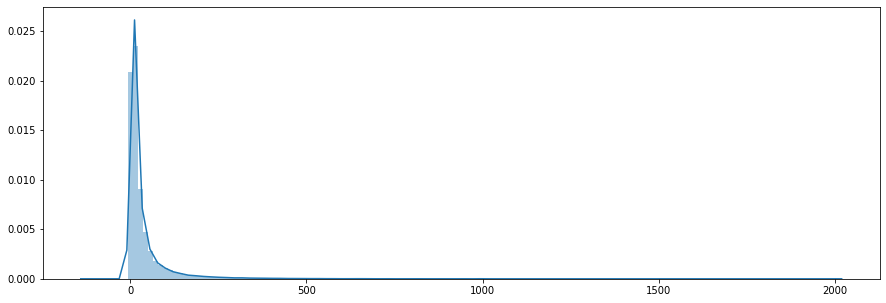

In [22]:
plt.figure(figsize=(15,5))
sb.distplot(mp_25['mp_25'].values, bins=150)

In [24]:
mp_25.describe()

,mp_25
count,93961.000000
mean,35.409915
std,67.539830
min,-120.300000
25%,5.899990
50%,12.940000
75%,34.600000
max,1999.000000
